In [1]:
import collections
import sys
import subprocess
import pandas as pd
import seaborn as sns
import os
import numpy as np
import uuid
import tempfile
import bnpy
import scikit_posthocs as sp
import itertools

from scipy.stats import kruskal, f_oneway
from scipy.stats import ttest_ind

sys.path.append('/opt/hydra/')

src = os.environ["HYDRA_SRC"]

import library.analysis as hy

import logging 

In [2]:
# This cmd was used to identify multimodal genes 
cmd = ["docker" ,
       "run",
       "-v", "$PWD:/data",
       "jpfeil/hydra@sha256:930436b5df08d88f2ba68483e0234dfb4ba639f40d6a725eb497422ffefb71de",
       "filter",
       "-e", "data/TARGET-osteo-minus-muscle.tsv",
       "--output-dir", "output",
       "--CPU", "15",
       "--min-mean-filter", "1.0"]

In [3]:
mm_genes = 'output/MultiModalGenes/'
exp_path = 'data/TARGET-osteo-minus-muscle.tsv'

In [4]:
exp = pd.read_csv(exp_path, sep='\t', index_col=0)

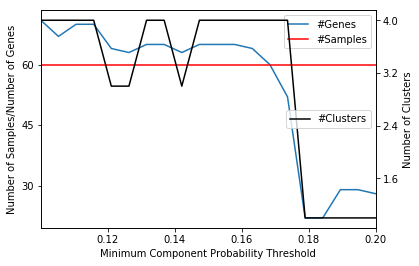

In [5]:
scan = hy.ScanEnrichmentAnalysis(exp_path=exp_path,
                                 mm_path=mm_genes,
                                 min_prob_range=np.linspace(0.1, 0.2, 20),
                                 gmt_path='data/Human_GOBP_AllPathways_no_GO_iea_December_01_2018_entrezgene.gmt',
                                 K=5,
                                 CPU=7).scan()

In [6]:
scan

,num_genesets,gs_terms,gs_term_genes,num_genes,num_clusters,num_samples
min_prob_filter,,,,,,
0.100000,26,NABA_SECRETED_FACTORS%MSigdb_C2%NABA_SECRETED_...,CHRNE|SLC6A2|HAND2|KCNE4|CRLF1|DES|TFF2|IGHG3|...,71,4,60
0.105263,19,NABA_SECRETED_FACTORS%MSigdb_C2%NABA_SECRETED_...,CHRNE|SLC6A2|HAND2|KCNE4|CRLF1|TFF2|IGHG3|CXCL...,67,4,60
0.110526,23,NABA_SECRETED_FACTORS%MSigdb_C2%NABA_SECRETED_...,CHRNE|SLC6A2|HAND2|KCNE4|CRLF1|TFF2|IGHG3|CXCL...,70,4,60
0.115789,25,NABA_SECRETED_FACTORS%MSigdb_C2%NABA_SECRETED_...,CHRNE|SLC6A2|HAND2|KCNE4|CRLF1|TFF2|IGHG3|CXCL...,70,4,60
0.121053,14,NABA_SECRETED_FACTORS%MSigdb_C2%NABA_SECRETED_...,CHRNE|SLC6A2|C15orf59|CRLF1|TFF2|IGHG3|CXCL11|...,64,3,60
0.126316,17,NABA_SECRETED_FACTORS%MSigdb_C2%NABA_SECRETED_...,FXYD6|SLC6A2|C15orf59|CHRNE|TFF2|IGHG3|CXCL11|...,63,3,60
0.131579,18,NABA_SECRETED_FACTORS%MSigdb_C2%NABA_SECRETED_...,FXYD6|SLC6A2|C15orf59|CHRNE|TFF2|IGHG3|CXCL11|...,65,4,60
0.136842,18,NABA_SECRETED_FACTORS%MSigdb_C2%NABA_SECRETED_...,FXYD6|SLC6A2|C15orf59|CHRNE|TFF2|IGHG3|CXCL11|...,65,4,60
0.142105,17,NABA_SECRETED_FACTORS%MSigdb_C2%NABA_SECRETED_...,SLC6A2|C15orf59|CHRNE|TFF2|IGHG3|CXCL11|C1QTNF...,63,3,60


In [29]:
res = hy.EnrichmentAnalysis(exp_path=exp_path,
                            mm_path=mm_genes,
                            min_prob_filter=0.142105,
                            min_effect_filter=1.0,
                            gmt_path='data/Human_GOBP_AllPathways_no_GO_iea_December_01_2018_entrezgene.gmt')

In [30]:
res.get_enriched_terms()

,Unnamed: 0,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
0,NABA_SECRETED_FACTORS%MSigdb_C2%NABA_SECRETED_...,NABA_SECRETED_FACTORS%MSigdb_C2%NABA_SECRETED_...,NABA_SECRETED_FACTORS%MSigdb_C2%NABA_SECRETED_...,17/183,146/10841,3.473774e-10,8.385691e-07,7.752001e-07,SFRP1/CXCL11/CCL21/CHRDL2/CXCL13/PRL/CXCL9/CXC...,17
1,NABA_MATRISOME_ASSOCIATED%MSigdb_C2%NABA_MATRI...,NABA_MATRISOME_ASSOCIATED%MSigdb_C2%NABA_MATRI...,NABA_MATRISOME_ASSOCIATED%MSigdb_C2%NABA_MATRI...,25/183,358/10841,1.466308e-09,1.769833e-06,1.636091e-06,SFRP1/CXCL11/MUC15/CCL21/CHRDL2/CXCL13/PRL/CST...,25
2,PEPTIDE LIGAND-BINDING RECEPTORS%REACTOME%R-HS...,PEPTIDE LIGAND-BINDING RECEPTORS%REACTOME%R-HS...,PEPTIDE LIGAND-BINDING RECEPTORS%REACTOME%R-HS...,10/183,59/10841,4.509609e-08,3.628732e-05,3.354516e-05,CXCL11/CCL21/CXCL13/CXCL9/CXCL8/PENK/NMU/TAC3/...,10
3,CLASS A 1 (RHODOPSIN-LIKE RECEPTORS)%REACTOME ...,CLASS A 1 (RHODOPSIN-LIKE RECEPTORS)%REACTOME ...,CLASS A 1 (RHODOPSIN-LIKE RECEPTORS)%REACTOME ...,11/183,100/10841,9.020935e-07,5.045445e-04,4.664171e-04,CXCL11/CCL21/CXCL13/CXCL9/CXCL8/TSHR/PENK/NMU/...,11
4,CELL-CELL SIGNALING%GOBP%GO:0007267,CELL-CELL SIGNALING%GOBP%GO:0007267,CELL-CELL SIGNALING%GOBP%GO:0007267,22/183,401/10841,1.045038e-06,5.045445e-04,4.664171e-04,SCN4B/SFRP1/CXCL11/SNAP25/CCL21/APBA2/C15orf59...,22
5,REGULATION OF SYSTEM PROCESS%GOBP%GO:0044057,REGULATION OF SYSTEM PROCESS%GOBP%GO:0044057,REGULATION OF SYSTEM PROCESS%GOBP%GO:0044057,15/183,203/10841,1.681289e-06,6.764385e-04,6.253214e-04,SCN4B/KCNH2/HAND2/ATP1B2/HRC/SLN/CACNA1G/DSG2/...,15
6,GPCR LIGAND BINDING%REACTOME DATABASE ID RELEA...,GPCR LIGAND BINDING%REACTOME DATABASE ID RELEA...,GPCR LIGAND BINDING%REACTOME DATABASE ID RELEA...,12/183,145/10841,5.979529e-06,2.062083e-03,1.906256e-03,CXCL11/CCL21/CXCL13/CXCL9/CXCL8/IHH/TSHR/PENK/...,12
7,CHEMOKINE-MEDIATED SIGNALING PATHWAY%GOBP%GO:0...,CHEMOKINE-MEDIATED SIGNALING PATHWAY%GOBP%GO:0...,CHEMOKINE-MEDIATED SIGNALING PATHWAY%GOBP%GO:0...,6/183,31/10841,1.104802e-05,3.333740e-03,3.081816e-03,CXCL11/CCL21/CXCL13/CXCL9/CXCL8/TFF2,6
8,CHEMOKINE RECEPTORS BIND CHEMOKINES%REACTOME D...,CHEMOKINE RECEPTORS BIND CHEMOKINES%REACTOME D...,CHEMOKINE RECEPTORS BIND CHEMOKINES%REACTOME D...,5/183,20/10841,1.637711e-05,4.392706e-03,4.060758e-03,CXCL11/CCL21/CXCL13/CXCL9/CXCL8,5
9,ANTIMICROBIAL HUMORAL IMMUNE RESPONSE MEDIATED...,ANTIMICROBIAL HUMORAL IMMUNE RESPONSE MEDIATED...,ANTIMICROBIAL HUMORAL IMMUNE RESPONSE MEDIATED...,5/183,21/10841,2.120216e-05,5.118201e-03,4.731429e-03,CXCL11/CXCL13/GNLY/CXCL9/CXCL8,5


In [31]:
genes = res.get_enriched_term_genes()

len(genes)

63

In [32]:
clus = hy.MultivariateMixtureModel(data=exp.reindex(genes),
                                   center=True,
                                   gamma=5.0,
                                   variance=2.0,
                                   K=5, 
                                   verbose=True)

centering data


In [33]:
exp.reindex(genes).to_csv('model/training-data.tsv', sep='\t')

In [34]:
bnpy.ioutil.ModelWriter.save_model(clus.hmodel,
                                   'model',
                                   prefix='OsteoNoMuscle')

In [35]:
assignments = clus.get_assignments(exp.reindex(genes))

assign = pd.DataFrame(index=exp.columns,
                      columns=[1])

for sample, assignment in zip(exp.columns, assignments):
    assign.loc[sample, 1] = assignment + 1

In [36]:
hclust = hy.HClust(data=exp.reindex(genes))

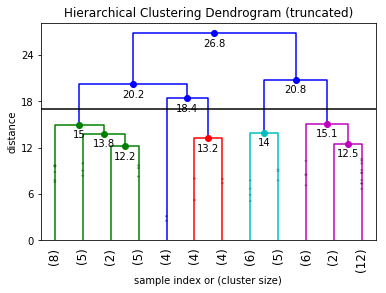

In [37]:
hclust.plot_row_linkage(17)
row_groups = hclust.get_row_groups(17)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#col_order = assign.sort_values(1).index.values

g = sns.clustermap(exp.reindex(genes).dropna(),
                   z_score=0,
                   method='ward',
                   center=0,
                   cmap=sns.diverging_palette(240, 10, n=7),
                   figsize=(10, 10))

ax = g.ax_heatmap

ax.set_xticklabels([])
ax.set_xticks([])
#ax.set_yticklabels([])
#ax.set_yticks([])

pth = 'img/expression-heatmap.svg'
plt.savefig(pth, format='svg', bbox_inches='tight')

In [39]:
fgseas = clus.get_cluster_features(exp,
                                  gmt='/opt/hydra/data/Human_GO_AllPathways_no_GO_iea_October_01_2018_symbol.gmt')

In [40]:
len(fgseas)

3

In [45]:
t = fgseas[2]

t[(t['padj'] < 0.05) & (t['ES'] > 0)].sort_values('NES', ascending=False)

,pval,padj,ES,NES,nMoreExtreme,size,leadingEdge
pathway,,,,,,,
HALLMARK_INTERFERON_GAMMA_RESPONSE%MSIGDB_C2%HALLMARK_INTERFERON_GAMMA_RESPONSE,0.000292,0.008532,0.598549,4.903552,0,185,CXCL9|CXCL11|CCL5|CXCL10|PSMB9|GBP4|CASP1|IL18...
RESPONSE TO INTERFERON-GAMMA%GOBP%GO:0034341,0.000244,0.008369,0.673956,4.853220,0,103,HLA-F|CCL5|CCL4|GBP4|LGALS9|CCL14|CASP1|CCL8|A...
HALLMARK_INTERFERON_ALPHA_RESPONSE%MSIGDB_C2%HALLMARK_INTERFERON_ALPHA_RESPONSE,0.000240,0.008369,0.678913,4.802081,0,96,CXCL11|CXCL10|PSMB9|GBP4|CASP1|BATF2|IFITM3|PS...
IMMUNOREGULATORY INTERACTIONS BETWEEN A LYMPHOID AND A NON-LYMPHOID CELL%REACTOME DATABASE ID RELEASE 66%198933,0.000217,0.008369,0.739314,4.722598,0,65,CD3E|CD3D|LILRB2|HLA-F|IGKV3-11|FCGR3A|SIGLEC1...
CELLULAR RESPONSE TO INTERFERON-GAMMA%GOBP%GO:0071346,0.000234,0.008369,0.656610,4.584226,0,91,HLA-F|CCL5|CCL4|GBP4|LGALS9|CCL14|CASP1|CCL8|A...
DEFENSE RESPONSE%GOBP%GO:0006952,0.000500,0.010816,0.475842,4.535522,0,470,IGHG2|CFP|PTPRCAP|IGHA1|S100A8|FCN1|IGHG1|S100...
INNATE IMMUNE RESPONSE%GOBP%GO:0045087,0.000328,0.008782,0.519408,4.488190,0,241,IGHG2|CFP|IGHA1|FCN1|IGHG1|HLA-F|CCL5|CCL4|GBP...
DEFENSE RESPONSE TO OTHER ORGANISM%GOBP%GO:0098542,0.000268,0.008462,0.553914,4.267782,0,140,IGHG2|CFP|IGHA1|S100A8|IGHG1|S100A9|GNLY|PYCAR...
HALLMARK_ALLOGRAFT_REJECTION%MSIGDB_C2%HALLMARK_ALLOGRAFT_REJECTION,0.000269,0.008462,0.544786,4.254688,0,148,LTB|CD3E|CFP|CD3D|CD2|CXCL9|CD7|CCL5|CCL4|CCR5...


In [46]:
pth = 'data/xCell_TARGET-osteosarcoma-2019-02-02_xCell_1553020819.txt'
xcell = pd.read_csv(pth, sep='\t', index_col=0)
xcell.columns = [x.replace('.', '-') for x in xcell.columns]

In [47]:
igroups = dict((group, []) for group in assign[1].unique())
data = pd.DataFrame(columns=['sample', 
                             'cluster', 
                             'source', 
                             'feature', 
                             'value'])

for sample in assign.index.values:
  
    assignment = assign.loc[sample, 1]
    
    if pd.isnull(assignment):
        continue
    
    igroups[assignment].append(sample)
        
    for cell, value in xcell[sample].iteritems():
        data.loc[len(data), :] = [sample, assignment, 'xCell', cell, value]
        
skip = ['P-value', 'Pearson Correlation', 'RMSE']

data = data[~data['feature'].isin(skip)]
        
data['value'] = pd.to_numeric(data['value'])

In [48]:
data

,sample,cluster,source,feature,value
0,TARGET-40-0A4HMC-01A-01R,3,xCell,Adipocytes,0.0000
1,TARGET-40-0A4HMC-01A-01R,3,xCell,Astrocytes,0.0000
2,TARGET-40-0A4HMC-01A-01R,3,xCell,B-cells,0.0000
3,TARGET-40-0A4HMC-01A-01R,3,xCell,Basophils,0.0990
4,TARGET-40-0A4HMC-01A-01R,3,xCell,CD4+ T-cells,0.0000
5,TARGET-40-0A4HMC-01A-01R,3,xCell,CD4+ Tcm,0.0095
6,TARGET-40-0A4HMC-01A-01R,3,xCell,CD4+ Tem,0.0212
7,TARGET-40-0A4HMC-01A-01R,3,xCell,CD4+ memory T-cells,0.0000
8,TARGET-40-0A4HMC-01A-01R,3,xCell,CD4+ naive T-cells,0.0000
9,TARGET-40-0A4HMC-01A-01R,3,xCell,CD8+ T-cells,0.0000


In [49]:
from scipy.stats import kruskal, f_oneway
import collections
import scikit_posthocs as sp
import itertools

sigs = collections.defaultdict(list)

p_values = pd.DataFrame(columns=['source', 
                                 'feature', 
                                 'A', 
                                 'B', 
                                 'holm p-value'])

for source, rows in data.groupby('source'):
    
    print(source)
    print()
    nfeatures = len(rows['feature'].unique())
    alpha = 1 - (1 - 0.05) ** (1.0 / nfeatures)
    print(alpha)
    for feature in rows['feature'].unique():
        print(feature)
        groups3 = []
        for i, rows in data[data['feature'] == feature].groupby('cluster'):
            groups3.append(list(rows['value'].values))
    
        try:
            stat, pvalue = kruskal(*groups3)
            print(feature, pvalue, pvalue < alpha)
        
        except:
            continue
    
        if pvalue < alpha:
            sigs[source].append(feature)
            
            res = sp.posthoc_mannwhitney(groups3, 
                                         p_adjust='holm')
            
            print res
            
            for i, j in itertools.combinations(range(len(groups3)),
                                               2):
                
                if i == j:
                    continue 
                    
                p_values.loc[len(p_values), :] = [source,
                                                  feature,
                                                  i, 
                                                  j,
                                                  res.iloc[i, j]]

xCell
()
0.000765278582887
Adipocytes
('Adipocytes', 0.29034398254638494, False)
Astrocytes
('Astrocytes', 0.6777846874622828, False)
B-cells
('B-cells', 0.133544744595562, False)
Basophils
('Basophils', 0.9022602882521206, False)
CD4+ T-cells
CD4+ Tcm
('CD4+ Tcm', 0.3226852590739519, False)
CD4+ Tem
('CD4+ Tem', 8.436985634157808e-05, True)
          1         2         3
1 -1.000000  0.583211  0.000911
2  0.583211 -1.000000  0.003960
3  0.000911  0.003960 -1.000000
CD4+ memory T-cells
('CD4+ memory T-cells', 0.2640230362873406, False)
CD4+ naive T-cells
('CD4+ naive T-cells', 0.848803823534602, False)
CD8+ T-cells
('CD8+ T-cells', 0.7832400108448612, False)
CD8+ Tcm
('CD8+ Tcm', 0.6769356797683741, False)
CD8+ Tem
('CD8+ Tem', 0.3399531828269507, False)
CD8+ naive T-cells
('CD8+ naive T-cells', 0.8817188309133223, False)
CLP
('CLP', 0.5458873819346208, False)
CMP
('CMP', 0.5551723411692177, False)
Chondrocytes
('Chondrocytes', 0.08865070582840717, False)
Class-switched memory B-cells

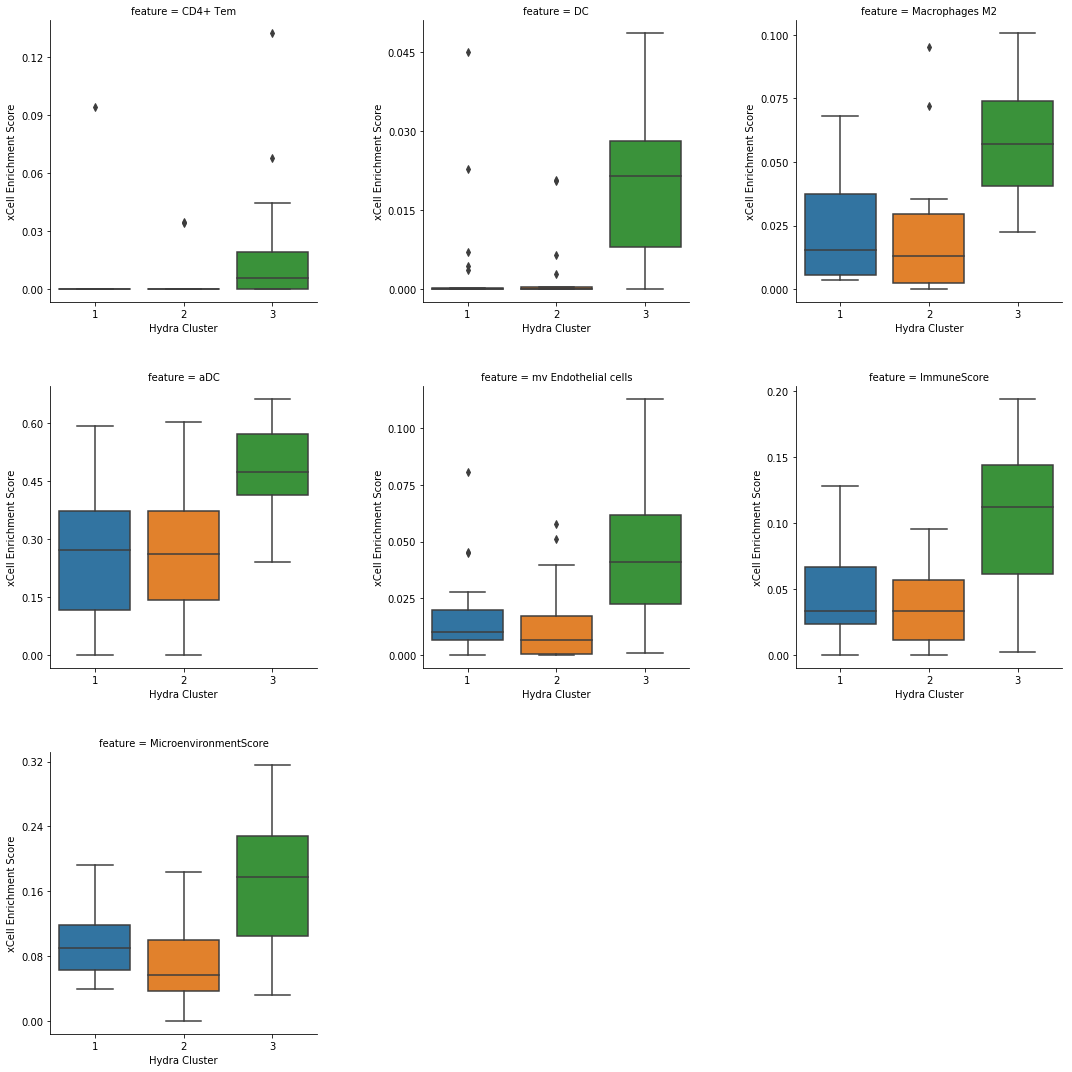

In [50]:
mask = (data['source'] == 'xCell') & (data['feature'].isin(sigs['xCell']))

t = data[mask]

g = sns.catplot(x='cluster', 
                y='value', 
                col='feature',
                kind='box',
                col_wrap=3,
                sharex=False,
                sharey=False,
                data=t)

for i in range(len(g.axes)):
    g.axes[i].set_xlabel('Hydra Cluster')
    g.axes[i].set_ylabel('xCell Enrichment Score')
    
plt.subplots_adjust(hspace=0.3, wspace=0.4)

In [69]:
def get_event(event):
    if pd.isnull(event):
        print("NULL")
        return np.nan
    
    events = ['Relapse',
              'Death', 
              'Progression',
              'Event',
              'Second Malignant Neoplasm',
              'SMN']
    
    if event in ['Censored', 'No event', 'None']:
        return 0
    
    elif event in events:
        return 1 
    
    else:
        raise ValueError(event)
        
def get_vital(vital):
    if pd.isnull(vital):
        #print("NULL")
        return np.nan
    
    
    if vital == 'Alive':
        return 0
    
    elif vital == 'Dead':
        return 1
    
    else:
        raise ValueError(vital)

pth = 'data/TARGET_OS_ClinicalData_Discovery_20181009.xlsx'
clinical = pd.read_excel(pth, index_col=0)

surv = pd.DataFrame(index=exp.columns, 
                    columns=['OS', 'vital', 'EFS', 'event'])

for sample in exp.columns:
    root = '-'.join(sample.split('-')[:3])
    if root not in clinical.index:
        print "Missing: ", sample
        continue
    
    OS = clinical.loc[root, 'Overall Survival Time in Days'].item()
    vital = get_vital(clinical.loc[root, 'Vital Status'])
    
    EFS = clinical.loc[root, 'Event Free Survival Time in Days'].item()
    #print(repr(clinical.loc[root, 'First Event']))
    event = get_event(clinical.loc[root, 'First Event'])
    
    surv.loc[sample, :] = [OS, vital, EFS, event]
    

for sample in exp.columns:
    surv.loc[sample, 'cluster'] = int(assign.loc[sample, 1])
    
surv = surv[surv['cluster'].isin([2.0, 3.0])]
    
surv.to_csv('data/TARGET-osteo-minus-muscle-survival.tsv', sep='\t')

surv.head()

NULL
NULL


,OS,vital,EFS,event,cluster
TARGET-40-0A4HMC-01A-01R,377,0,377,0,3.0
TARGET-40-0A4HX8-01A-01R,1750,0,3050,0,2.0
TARGET-40-0A4I0W-01A-01R,683,0,683,0,2.0
TARGET-40-0A4I4M-01A-01R,708,0,708,0,3.0
TARGET-40-0A4I4O-01A-01R,627,1,235,1,2.0
